In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
def solve(A,B,C,D,x,y,z):
    """ 角度を計算する関数 """
    # 数学関数名などを読み込む
    abs = np.abs
    cos = np.cos
    sin = np.sin
    pi = np.pi
    atan = np.arctan
    sqrt = np.sqrt
    # 角度
    thetas = np.zeros((3,))
    angles = np.array([pi * (2.0/3.0)*i for i in range(3)])
    for i in range(3):
        phi_0 = angles[i]
        # sympyで導出した式
        P = -A**2 + 2*A*D + 2*A*x*cos(phi_0) + 2*A*y*sin(phi_0) - B**2 + C**2 - D**2 - 2*D*x*cos(phi_0) - 2*D*y*sin(phi_0) - x**2 - y**2 - z**2
        Q = -2*B*z
        R = -2*A*B + 2*B*D + 2*B*x*cos(phi_0) + 2*B*y*sin(phi_0)
        theta_0 = -2*atan((Q - sqrt(-P**2 + Q**2 + R**2))/(P - R))
        theta_1 = -2*atan((Q + sqrt(-P**2 + Q**2 + R**2))/(P - R))
        # 絶対値の小さい方を選択する
        thetas[i] = theta_1 if abs(theta_0) > abs(theta_1) else theta_0
    return thetas

In [6]:
def visualize(A,B,C,D,x,y,z):
    """ 可視化を行う関数 """
    # 可視化に必要なオブジェクト
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    
    # 単位ベクトル
    thetas = solve(A,B,C,D,x,y,z)
    angles = np.array([np.pi * (2.0/3.0)*i for i in range(3)])
    unit_vectors = np.array([np.cos(angles),np.sin(angles),np.zeros(3)]).T
    ez = np.array([0,0,1])
    
    # 各座標の計算
    A_vectors = A * unit_vectors  
    B_vectors = np.array([A_vectors[i] + B*( unit_vectors[i] * np.cos(thetas[i])- ez * np.sin(thetas[i]) ) for i in range(3)])
    D_vector = np.array([x,y,z])      
    C_vectors = D_vector + D * unit_vectors
    
    # 描画
    index = np.arange(4) % 3
    ax.clear()
    ax.plot(xs=A_vectors[index,0],ys=A_vectors[index,1],zs=A_vectors[index,2],color='r')
    ax.plot(xs=C_vectors[index,0],ys=C_vectors[index,1],zs=C_vectors[index,2],color='g')
    
    for i in range(3):
        temp = [[A_vectors[i,j],B_vectors[i,j]]for j in range(3)]
        ax.plot(temp[0],temp[1],temp[2],color='b')
        
        temp = [[B_vectors[i,j],C_vectors[i,j]]for j in range(3)]
        ax.plot(temp[0],temp[1],temp[2],color='y')
    
    ax.set_xlim([-300,300])
    ax.set_ylim([-300,300])
    ax.set_zlim([-500,100])
    
    return fig
    

In [7]:
# 機体パラメータ
A = 150.0
B = 220.0
C = 430.0
D = 100.0

# 最下部中心座標
x = 100.0
y = 0.0
z = -500.0

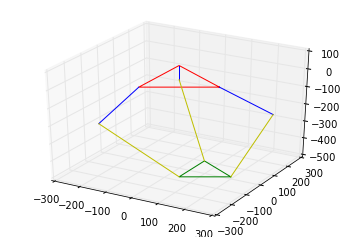

In [9]:
fig = visualize(A,B,C,D,x,y,z)